In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data=pd.read_csv('Data_Loan.csv')
data.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
data.shape

(252000, 13)

In [4]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [43]:
import matplotlib as plt 
import seaborn as sns

<Axes: >

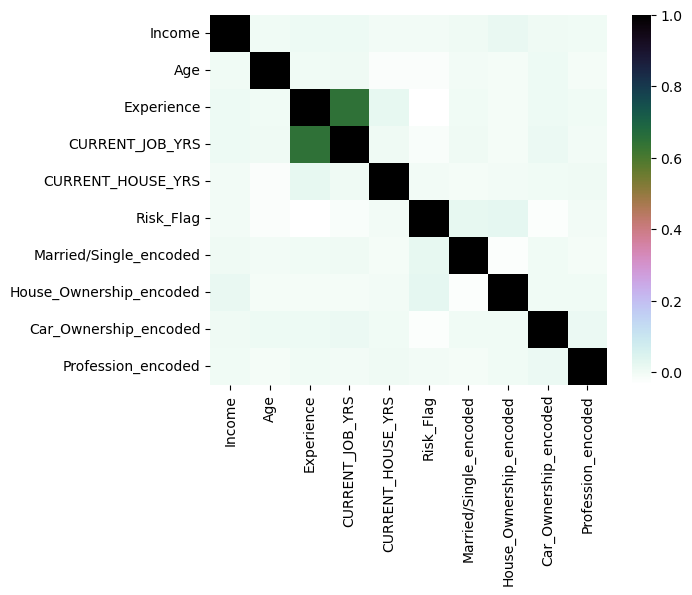

In [44]:
sns.heatmap(df.corr(),cmap='cubehelix_r')


In [46]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_encoded,House_Ownership_encoded,Car_Ownership_encoded,Profession_encoded
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000,0.897905,1.891722,0.301587,25.276746
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438,0.302774,0.391880,0.458948,14.728537
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000,1.000000,2.000000,0.000000,13.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000,1.000000,2.000000,0.000000,26.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000,1.000000,2.000000,1.000000,38.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000,1.000000,2.000000,1.000000,50.000000


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership','Profession']

In [9]:
for column in categorical_columns:
    data[column + '_encoded'] = encoder.fit_transform(data[column])

In [10]:
df = data.drop(categorical_columns, axis=1)
df

,Id,Income,Age,Experience,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_encoded,House_Ownership_encoded,Car_Ownership_encoded,Profession_encoded
0,1,1303834,23,3,Rewa,Madhya_Pradesh,3,13,0,1,2,0,33
1,2,7574516,40,10,Parbhani,Maharashtra,9,13,0,1,2,0,43
2,3,3991815,66,4,Alappuzha,Kerala,4,10,0,0,2,0,47
3,4,6256451,41,2,Bhubaneswar,Odisha,2,12,1,1,2,1,43
4,5,5768871,47,11,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,2,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,Kolkata,West_Bengal,6,11,0,1,2,0,45
251996,251997,2843572,26,10,Rewa,Madhya_Pradesh,6,11,0,1,2,0,3
251997,251998,4522448,46,7,Kalyan-Dombivli,Maharashtra,7,12,0,1,2,0,17
251998,251999,6507128,45,0,Pondicherry,Puducherry,0,10,0,1,2,0,27


In [12]:
df.drop(['Id','CITY','STATE'], axis=1,inplace=True)
df

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_encoded,House_Ownership_encoded,Car_Ownership_encoded,Profession_encoded
0,1303834,23,3,3,13,0,1,2,0,33
1,7574516,40,10,9,13,0,1,2,0,43
2,3991815,66,4,4,10,0,0,2,0,47
3,6256451,41,2,2,12,1,1,2,1,43
4,5768871,47,11,3,14,1,1,2,0,11
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,1,2,0,45
251996,2843572,26,10,6,11,0,1,2,0,3
251997,4522448,46,7,7,12,0,1,2,0,17
251998,6507128,45,0,0,10,0,1,2,0,27


In [13]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 667.8 kB/s eta 0:02:30
   ---------------------------------------- 0.1/99.7 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.4/99.7 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.6/99.7 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.7/99.7 MB 2.8 MB/s eta 0:00:35
   ---------------------------------------- 0.8/99.7 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 1.0/99.7 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 1.1/99.7 MB 3.1 MB/s eta 0:00:33
   ----------------------------------

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)

In [23]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [24]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [ ]:
#XGC Accuracy is 89% 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf_classifier.predict(X_test)


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [34]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



In [ ]:
#Random Forest Classifier Accuracy is 90%

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [37]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred = dt_classifier.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [40]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     44147
           1       0.52      0.57      0.54      6253

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.74     50400
weighted avg       0.89      0.88      0.88     50400



In [ ]:
#Decision Tree Classifier Accuracy is 88%